In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dataset.csv')
df.head()

,Equipment_ID,Temperature,Pressure,Vibration,Humidity,Flow_Rate,Power_Consumption,Oil_Level,Voltage,Maintenance_Type,Failure_Cause,Maintenance_Cost,Production_Volume,Planned_Downtime_Hours,Shifts_Per_Day,Production_Days_Per_Week,Installation_Date,Failure_Date,Maintenance_Date
0,77546,80.03,34.84,1.59,0.50,10.91,298.67,0.34,216.01,Preventive,Electrical Failure,579.69,196,4,2,6,2020-10-25,2021-08-16,2021-08-29
1,529399,90.39,32.63,1.29,0.43,10.20,300.22,0.41,220.97,Preventive,Electrical Failure,647.95,291,2,2,6,2019-12-16,2021-04-06,2021-04-19
2,194027,93.52,37.43,1.84,0.41,10.61,315.68,0.48,232.13,Corrective,Electrical Failure,664.85,308,4,1,5,2020-05-03,2021-05-14,2021-05-27
3,588205,91.57,35.36,1.44,0.29,10.59,296.97,0.55,217.34,Preventive,Mechanical Failure,582.15,328,4,3,5,2020-04-17,2021-07-11,2021-07-24
4,354137,82.37,31.54,1.66,0.48,10.40,339.35,0.56,216.79,Preventive,Electrical Failure,715.05,234,4,2,5,2020-08-16,2021-03-02,2021-03-15


In [3]:
df

,Equipment_ID,Temperature,Pressure,Vibration,Humidity,Flow_Rate,Power_Consumption,Oil_Level,Voltage,Maintenance_Type,Failure_Cause,Maintenance_Cost,Production_Volume,Planned_Downtime_Hours,Shifts_Per_Day,Production_Days_Per_Week,Installation_Date,Failure_Date,Maintenance_Date
0,77546,80.03,34.84,1.59,0.50,10.91,298.67,0.34,216.01,Preventive,Electrical Failure,579.69,196,4,2,6,2020-10-25,2021-08-16,2021-08-29
1,529399,90.39,32.63,1.29,0.43,10.20,300.22,0.41,220.97,Preventive,Electrical Failure,647.95,291,2,2,6,2019-12-16,2021-04-06,2021-04-19
2,194027,93.52,37.43,1.84,0.41,10.61,315.68,0.48,232.13,Corrective,Electrical Failure,664.85,308,4,1,5,2020-05-03,2021-05-14,2021-05-27
3,588205,91.57,35.36,1.44,0.29,10.59,296.97,0.55,217.34,Preventive,Mechanical Failure,582.15,328,4,3,5,2020-04-17,2021-07-11,2021-07-24
4,354137,82.37,31.54,1.66,0.48,10.40,339.35,0.56,216.79,Preventive,Electrical Failure,715.05,234,4,2,5,2020-08-16,2021-03-02,2021-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127635,22959,90.90,35.52,1.27,0.34,9.52,309.04,0.60,228.05,Corrective,Mechanical Failure,623.37,280,5,1,5,2020-04-26,2021-08-08,2021-08-21
127636,259803,99.93,39.77,1.98,0.28,11.16,285.89,0.54,229.97,Preventive,Electrical Failure,487.98,280,5,2,5,2019-08-09,2020-07-15,2020-07-28
127637,809374,103.23,39.56,1.93,0.39,11.80,273.59,0.60,220.25,Corrective,Electrical Failure,488.85,314,3,2,5,2019-04-06,2020-08-13,2020-08-26
127638,507580,81.36,36.65,1.95,0.50,9.04,267.20,0.58,212.01,Preventive,Mechanical Failure,489.96,242,4,2,5,2020-06-02,2021-02-26,2021-03-11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127640 entries, 0 to 127639
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Equipment_ID              127640 non-null  int64  
 1   Temperature               127640 non-null  float64
 2   Pressure                  127640 non-null  float64
 3   Vibration                 127640 non-null  float64
 4   Humidity                  127640 non-null  float64
 5   Flow_Rate                 127640 non-null  float64
 6   Power_Consumption         127640 non-null  float64
 7   Oil_Level                 127640 non-null  float64
 8   Voltage                   127640 non-null  float64
 9   Maintenance_Type          127640 non-null  object 
 10  Failure_Cause             127640 non-null  object 
 11  Maintenance_Cost          127640 non-null  float64
 12  Production_Volume         127640 non-null  int64  
 13  Planned_Downtime_Hours    127640 non-null  i

In [5]:
df.describe()

,Equipment_ID,Temperature,Pressure,Vibration,Humidity,Flow_Rate,Power_Consumption,Oil_Level,Voltage,Maintenance_Cost,Production_Volume,Planned_Downtime_Hours,Shifts_Per_Day,Production_Days_Per_Week
count,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000,127640.000000
mean,500582.256597,85.591581,34.498124,1.539766,0.490226,10.020976,291.898971,0.512708,219.371708,545.481933,263.635765,4.057662,1.965027,5.001254
std,288444.105950,8.101234,3.296694,0.351112,0.105724,1.164389,22.031253,0.116280,4.819428,104.516868,45.413838,0.868728,0.361519,0.347146
min,5.000000,50.000000,20.000000,0.000000,0.000000,5.000000,200.000000,0.000000,200.000000,100.000000,61.000000,1.000000,1.000000,4.000000
25%,251215.500000,80.150000,32.270000,1.300000,0.420000,9.240000,277.010000,0.430000,216.110000,474.760000,233.000000,4.000000,2.000000,5.000000
50%,501387.000000,85.620000,34.500000,1.540000,0.490000,10.020000,291.960000,0.510000,219.370000,545.820000,264.000000,4.000000,2.000000,5.000000
75%,750464.000000,91.080000,36.720000,1.780000,0.560000,10.810000,306.760000,0.590000,222.620000,615.892500,294.000000,5.000000,2.000000,5.000000
max,999979.000000,120.000000,50.000000,3.000000,1.000000,15.000000,400.000000,1.000000,240.000000,1000.000000,498.000000,8.000000,4.000000,7.000000


Data Preprocessing

In [6]:
# checking for missing values
df.isnull().sum()

,0
Equipment_ID,0
Temperature,0
Pressure,0
Vibration,0
Humidity,0
Flow_Rate,0
Power_Consumption,0
Oil_Level,0
Voltage,0
Maintenance_Type,0


In [7]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

Explorative Data Analysis

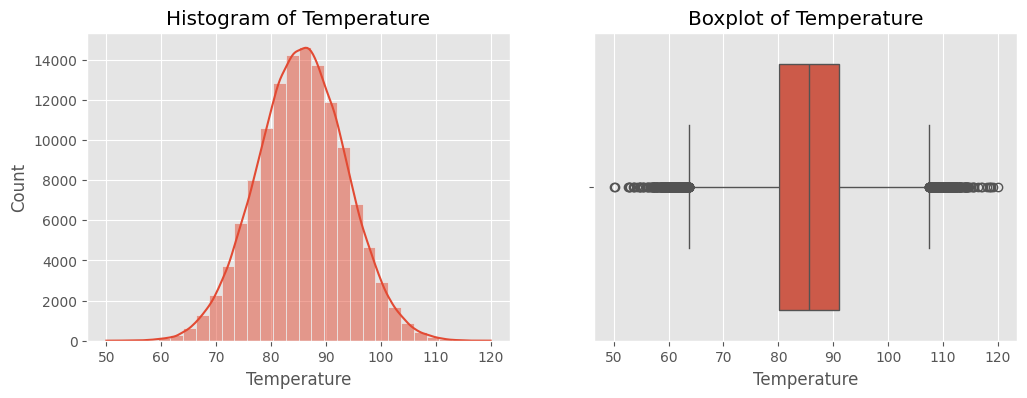

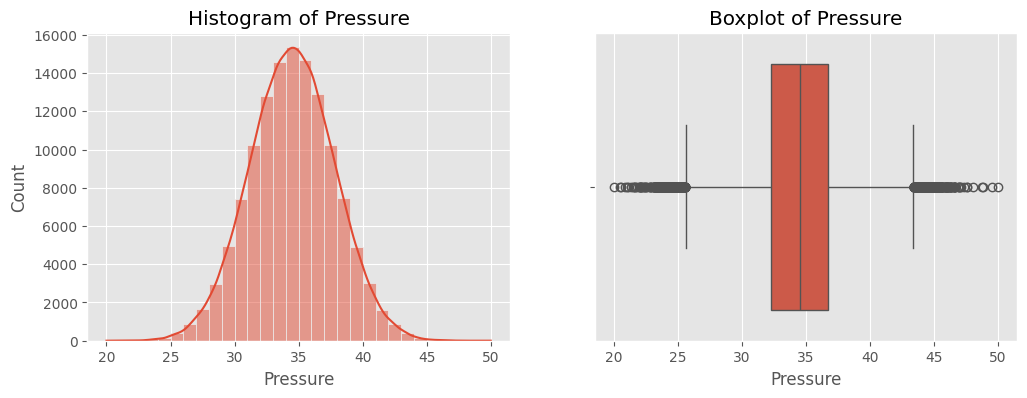

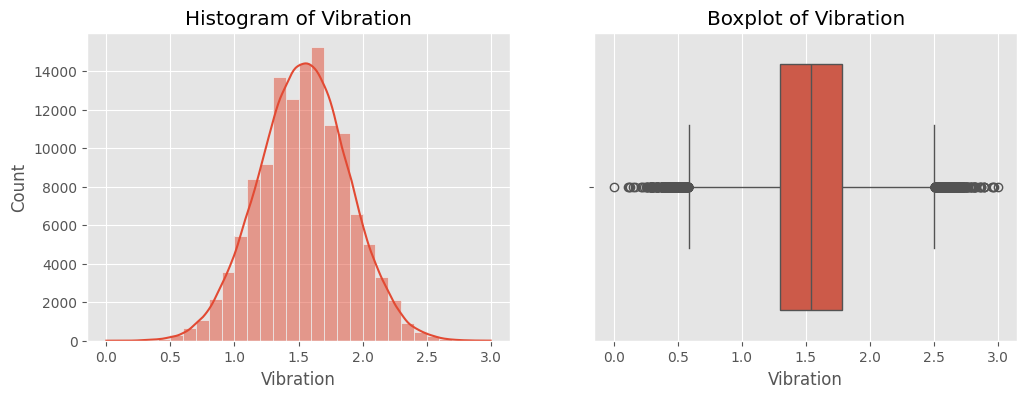

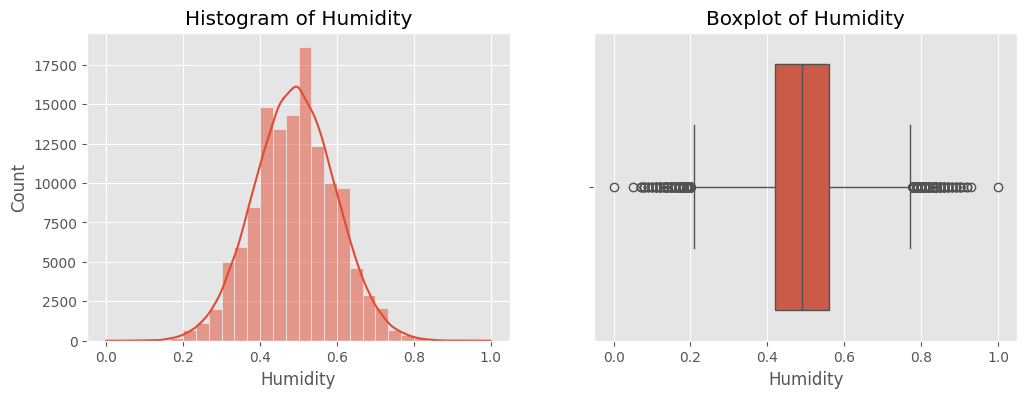

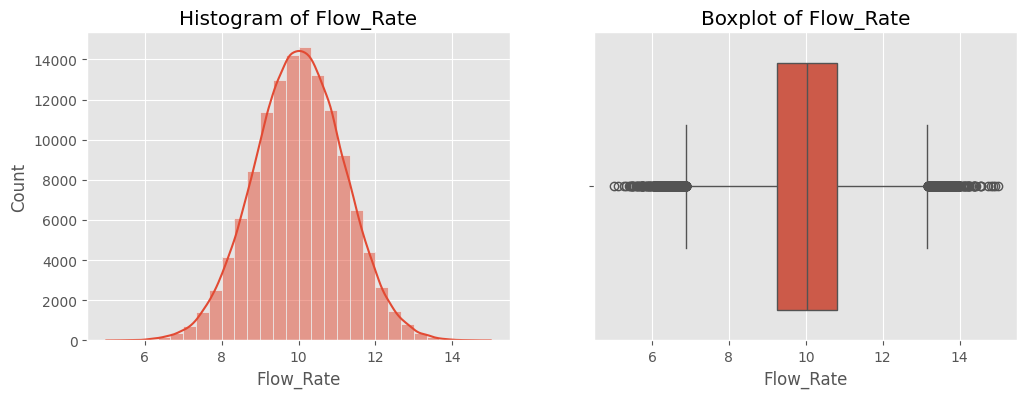

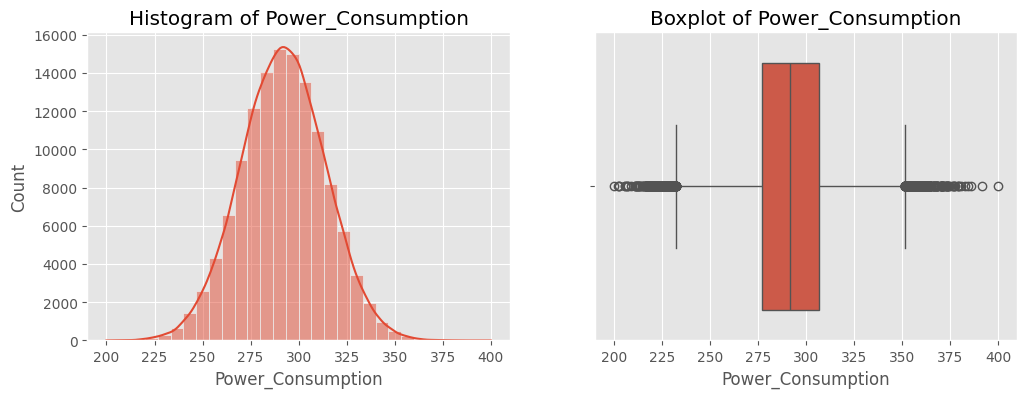

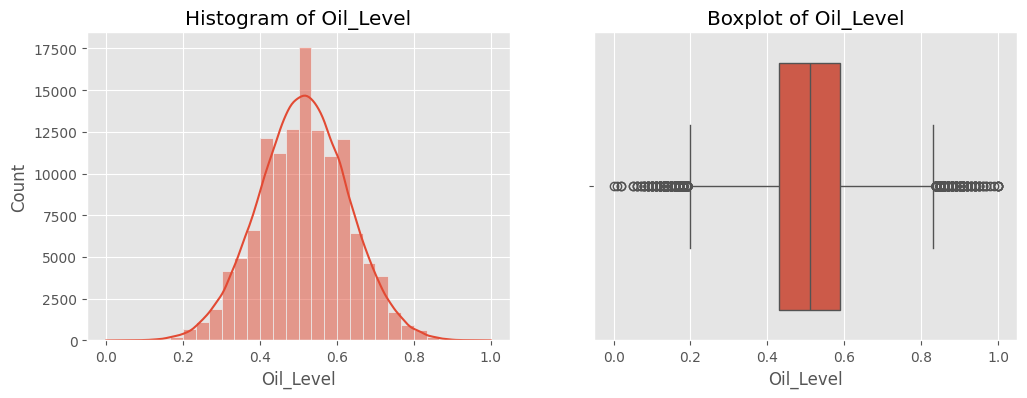

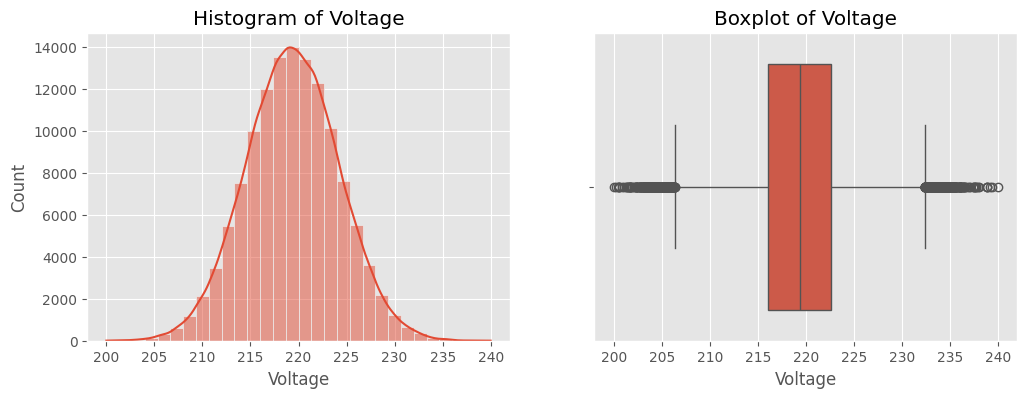

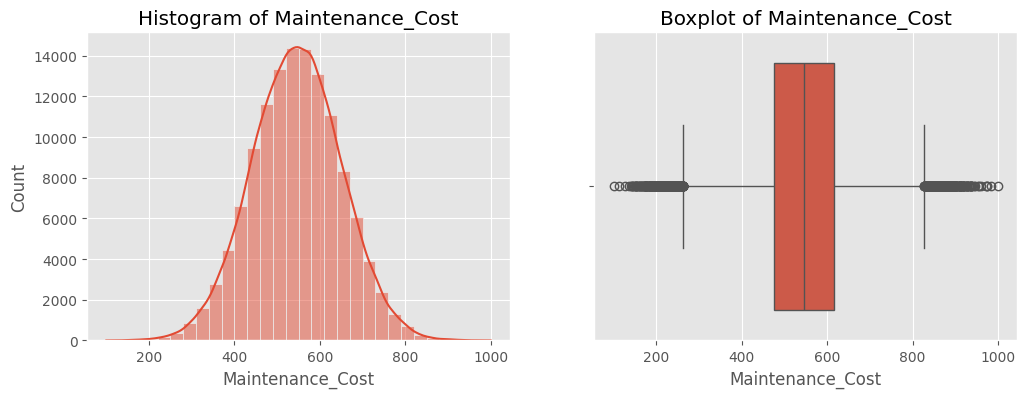

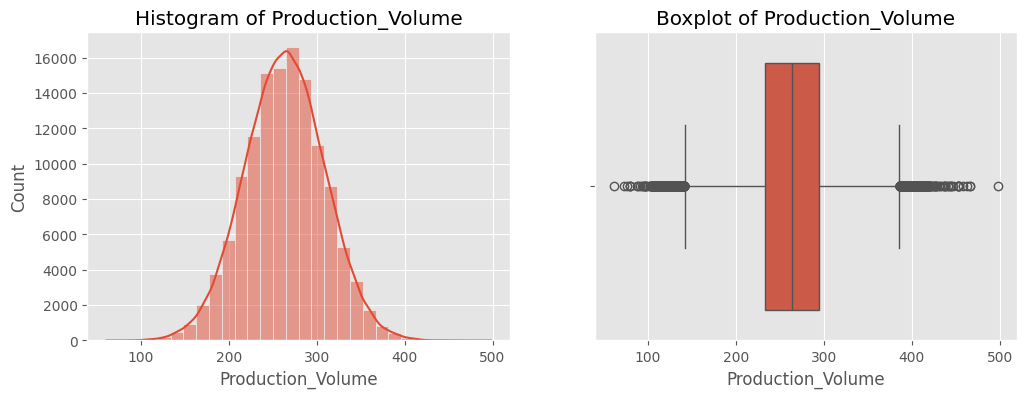

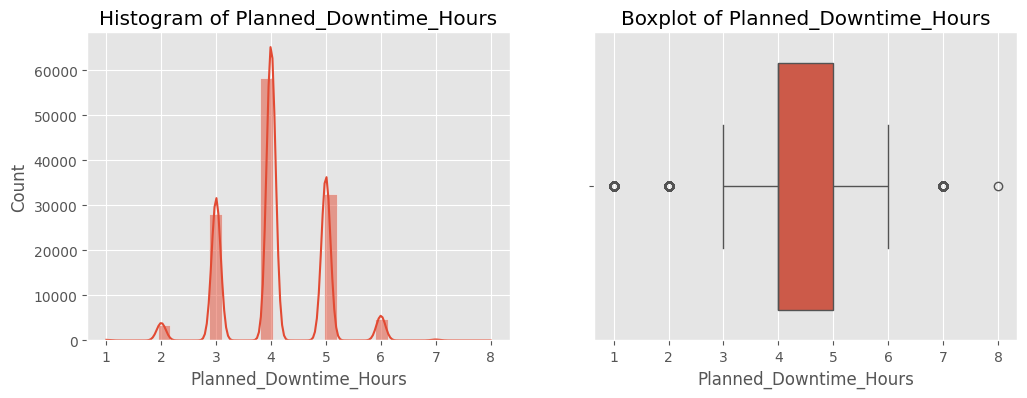

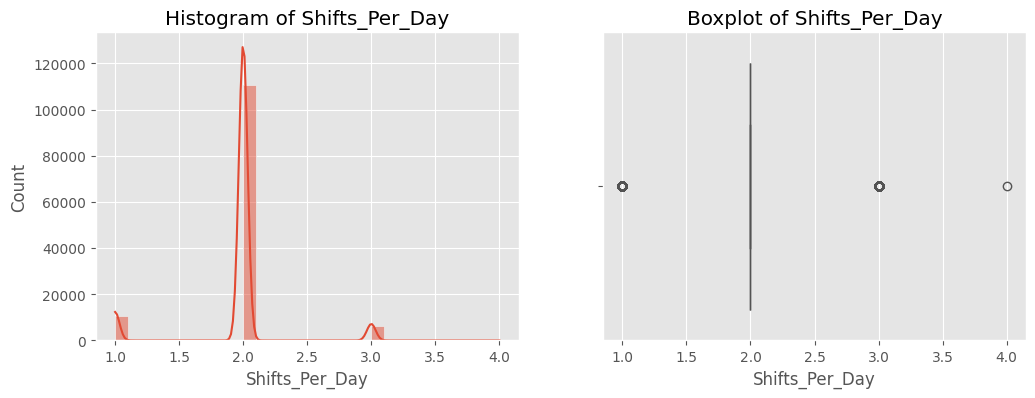

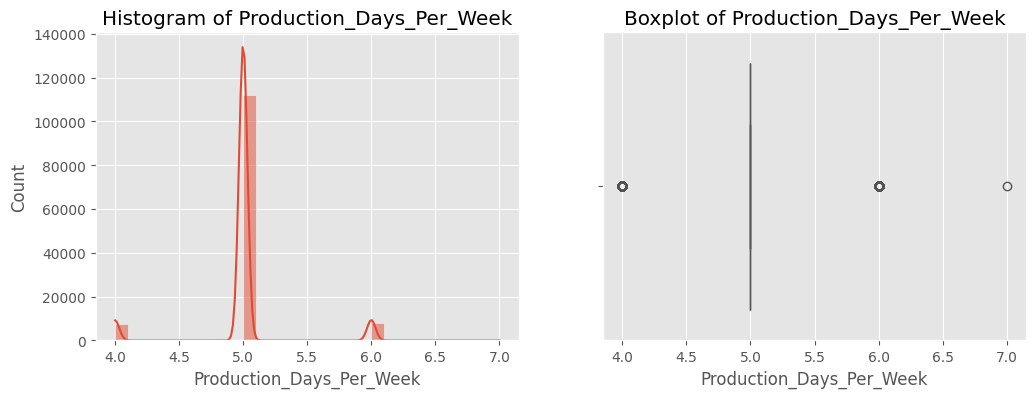

In [8]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=["int64", "float64"]).drop(columns=['Equipment_ID']).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns

# Set up visualization
plt.style.use("ggplot")

# Univariate analysis for numerical variables
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")

    plt.show()


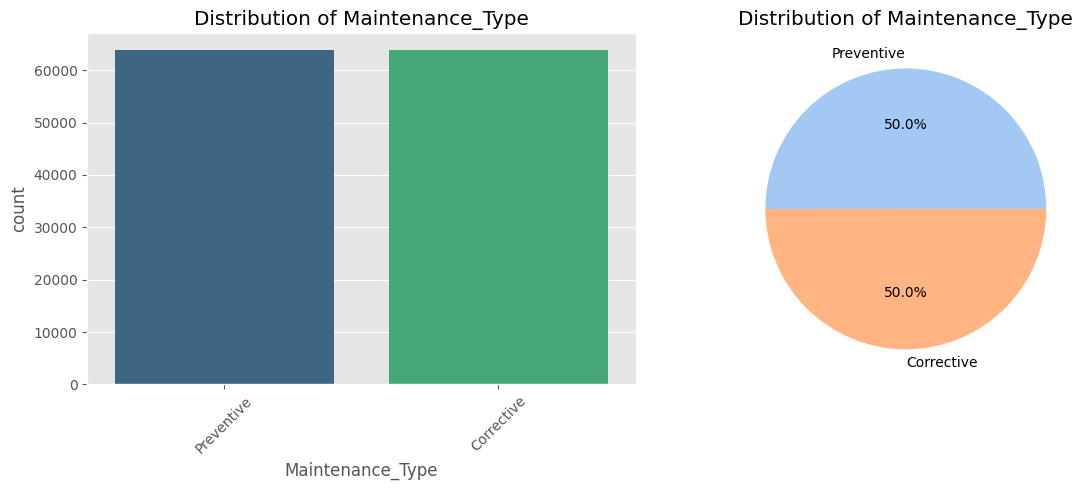

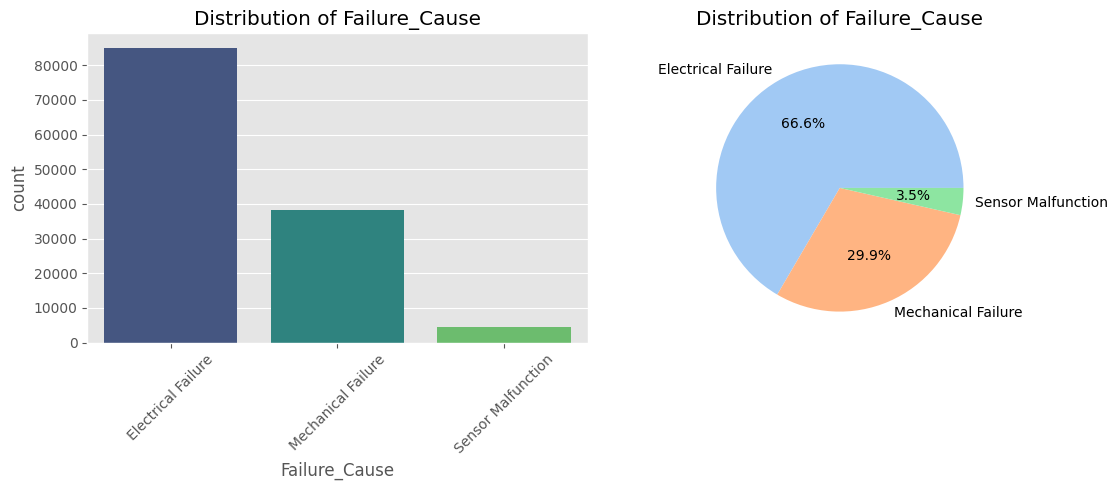

In [9]:
#Identify categorical columns
categorical_cols = ["Maintenance_Type", "Failure_Cause"]

# Univariate analysis for categorical variables
for col in categorical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Count Plot
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis", ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    axes[0].tick_params(axis='x', rotation=45)

    # Pie Chart
    df[col].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"), ax=axes[1])
    axes[1].set_title(f"Distribution of {col}")
    axes[1].set_ylabel("")  # Hide y-label for better appearance

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


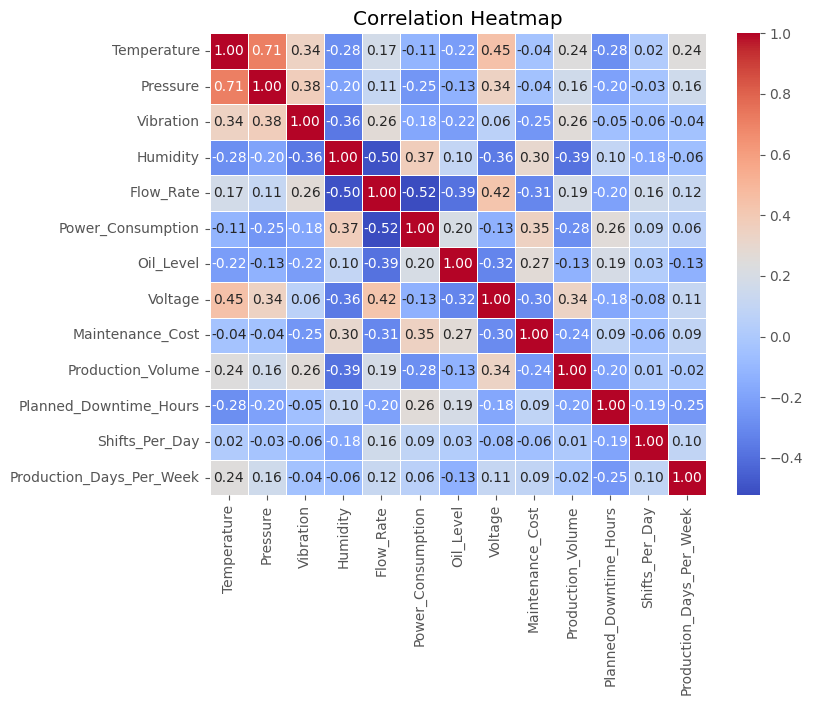

In [10]:
# Correlation Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



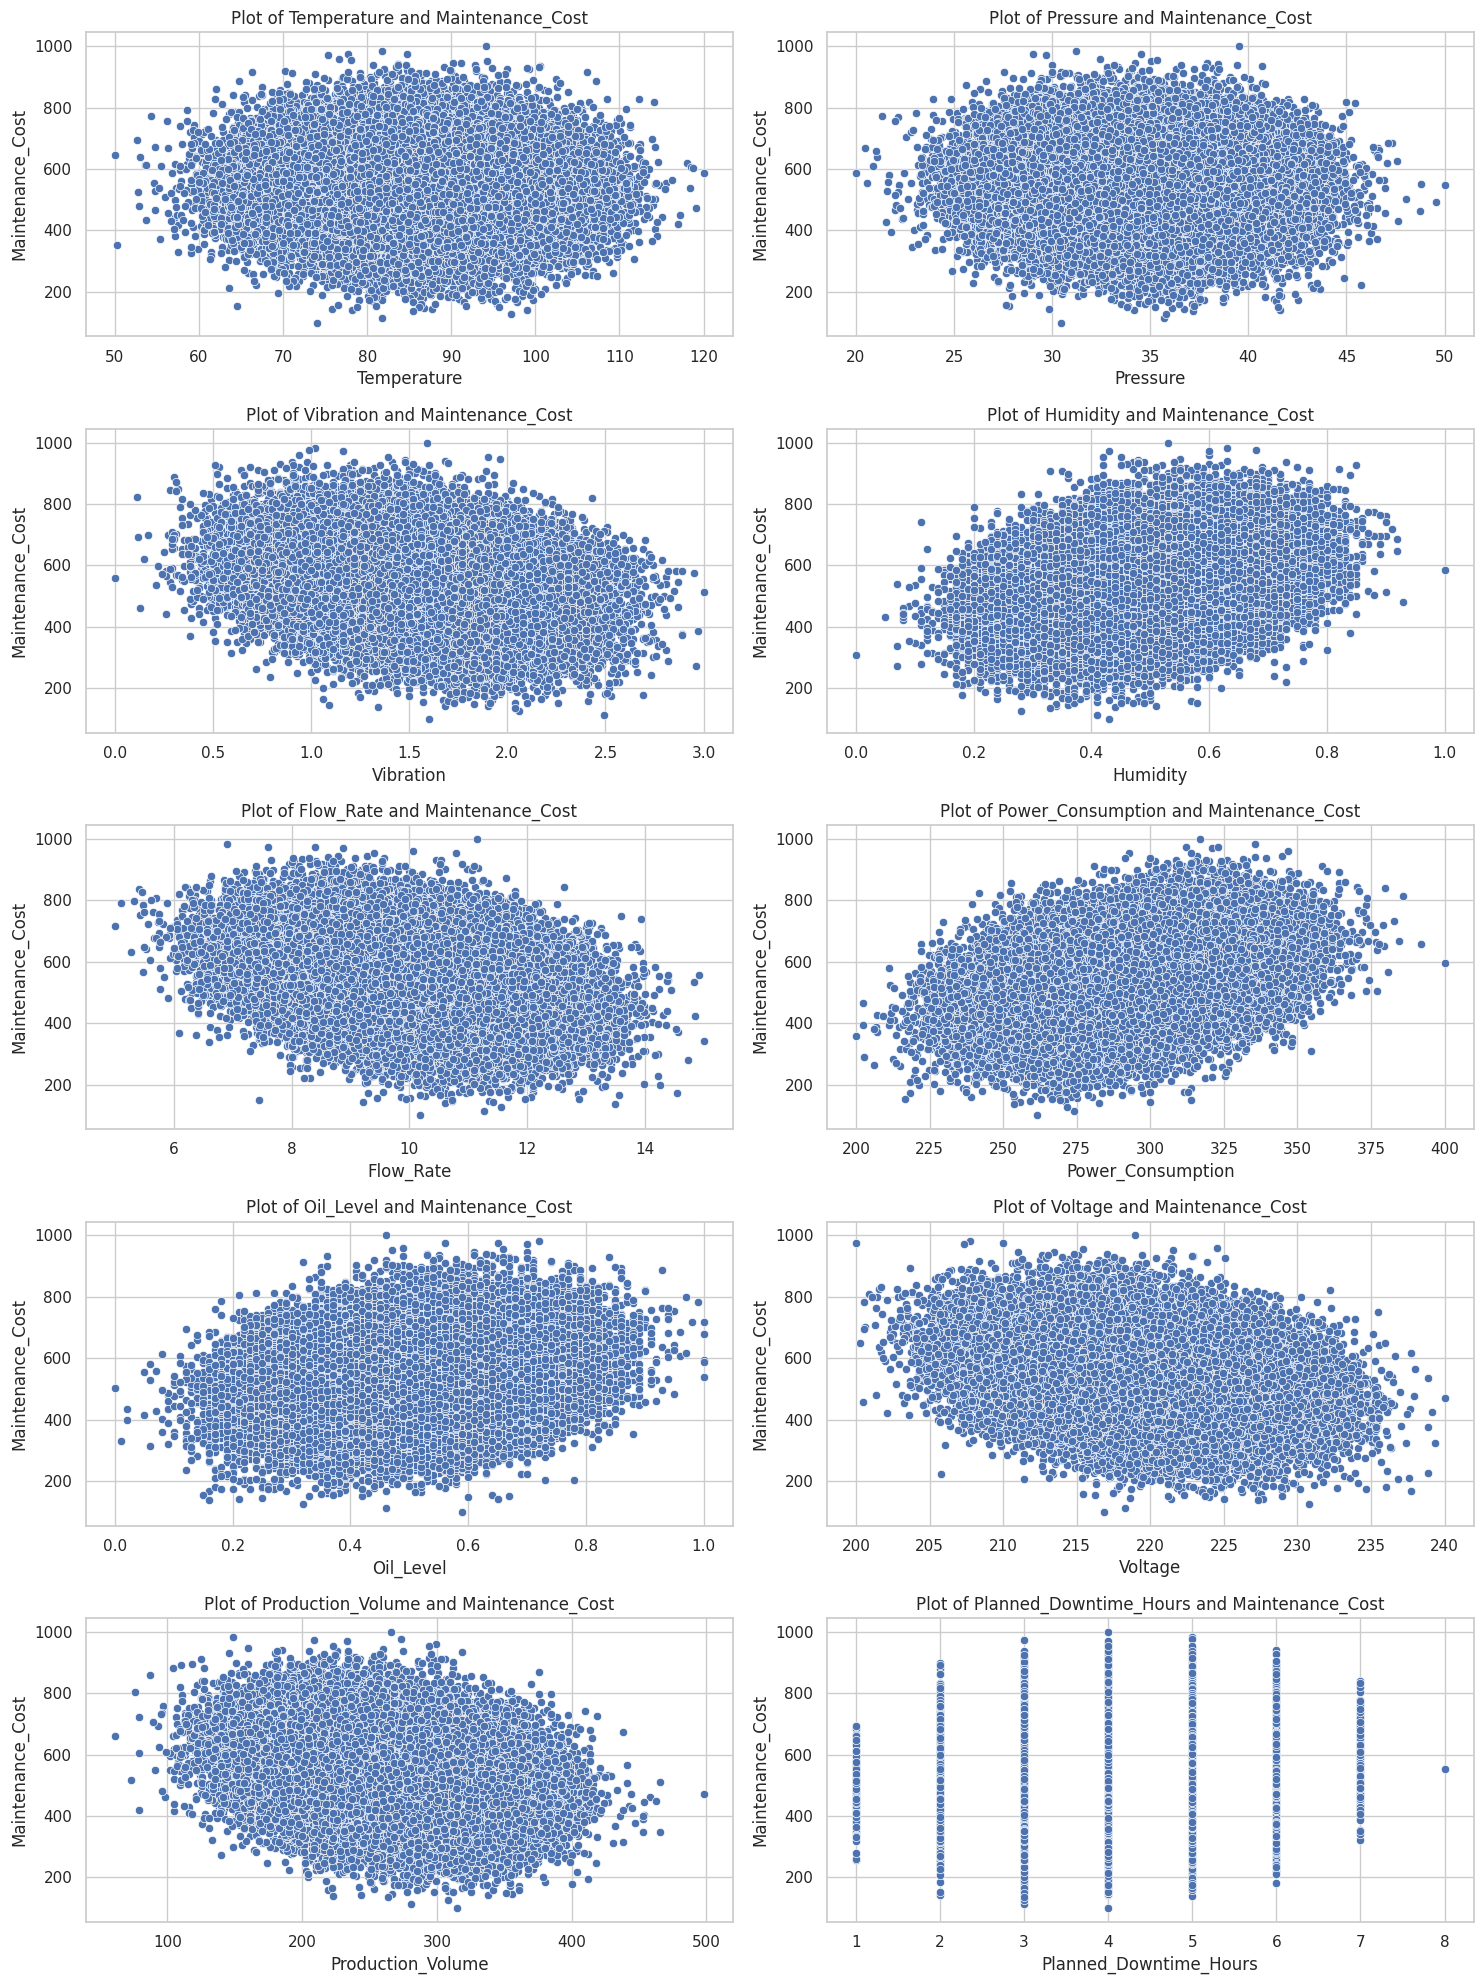

In [11]:
sns.set(style="whitegrid")

features = ['Temperature', 'Pressure', 'Vibration', 'Humidity', 'Flow_Rate',
                      'Power_Consumption', 'Oil_Level', 'Voltage',
                      'Production_Volume', 'Planned_Downtime_Hours']

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y='Maintenance_Cost', data=df, ax=axes[i])
    axes[i].set_title(f'Plot of {feature} and Maintenance_Cost')

plt.tight_layout()
plt.show()

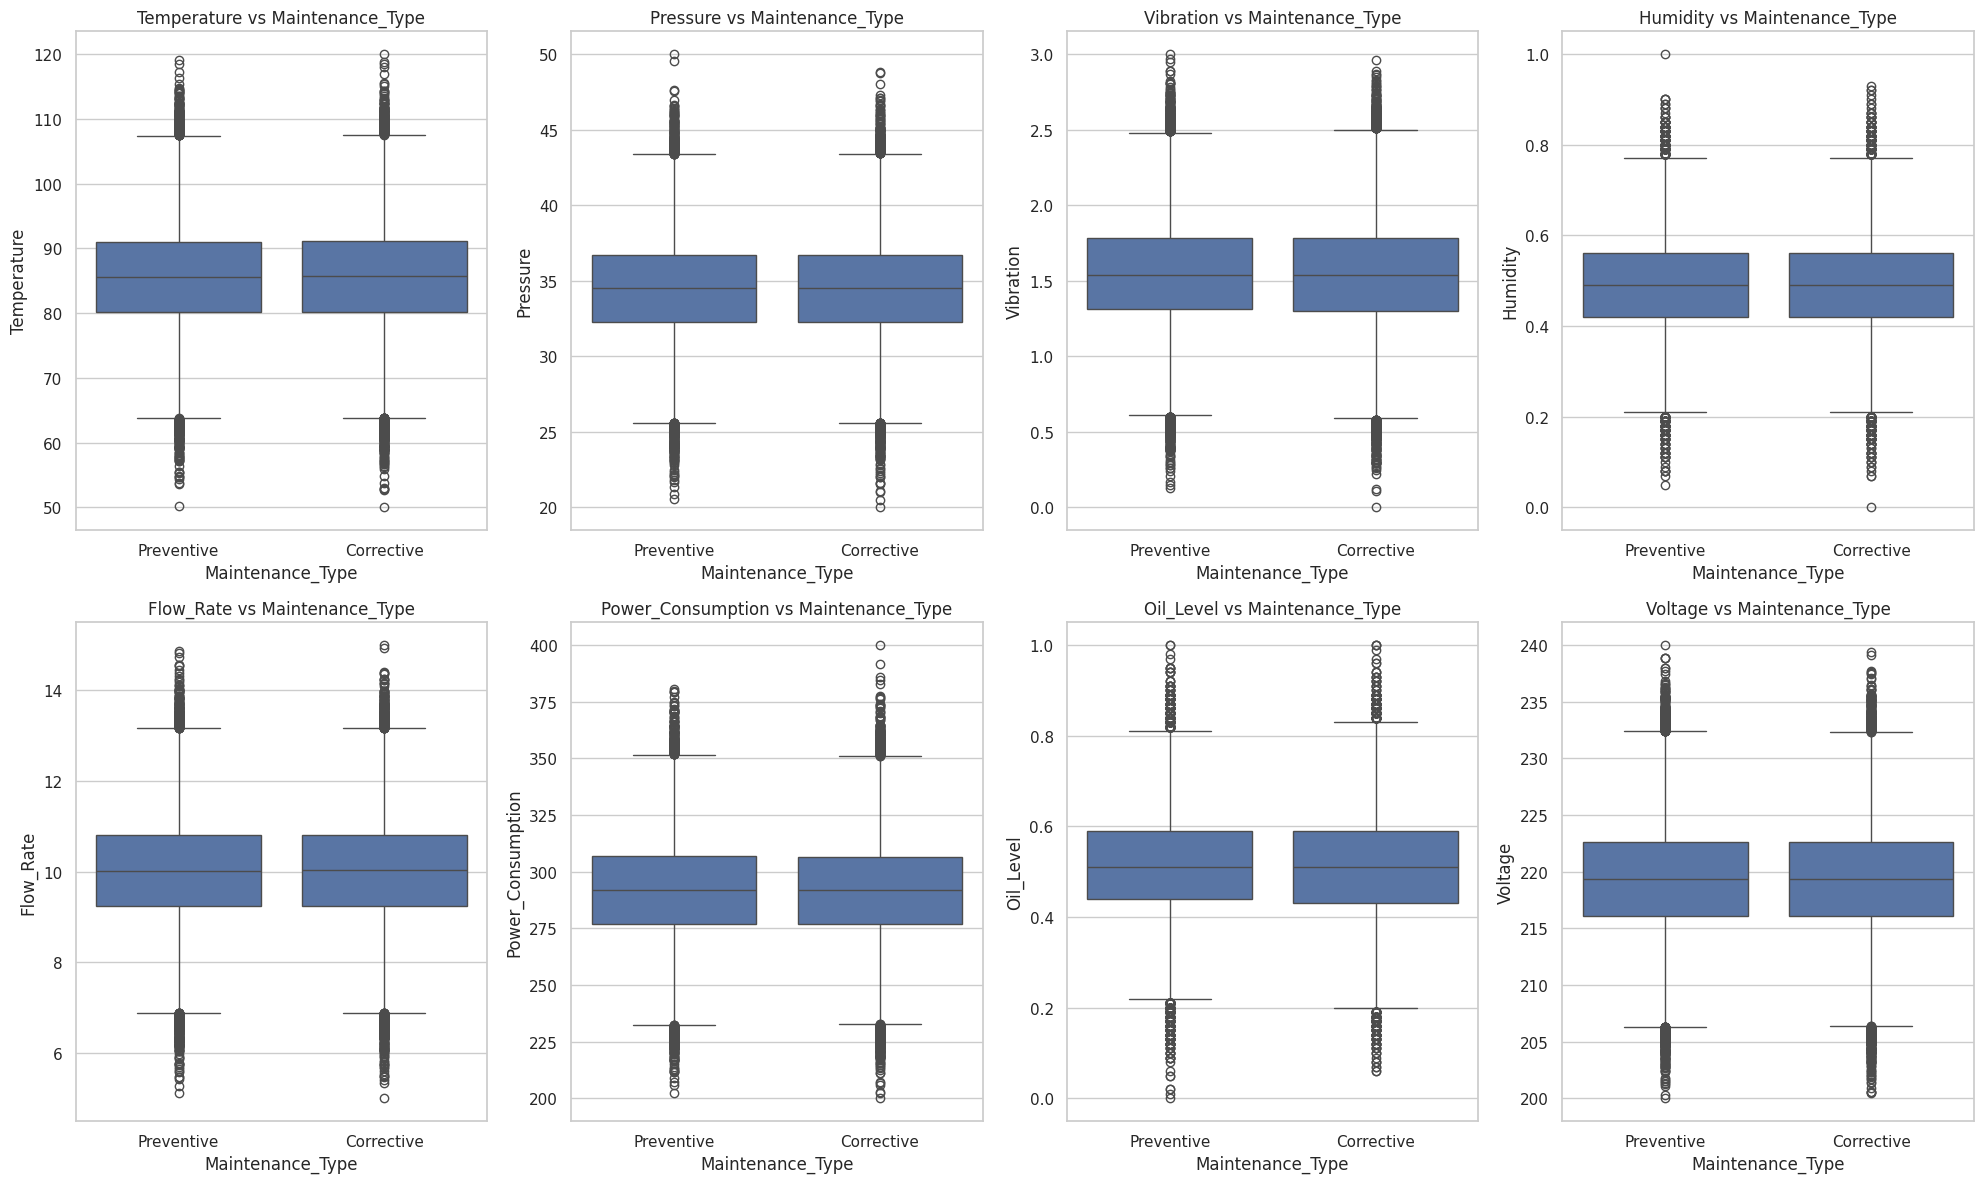

In [12]:
columns = ['Temperature', 'Pressure', 'Vibration', 'Humidity', 'Flow_Rate',
                  'Power_Consumption', 'Oil_Level', 'Voltage']

plt.figure(figsize=(20, 12))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df['Maintenance_Type'], y=df[column])
    plt.title(f'{column} vs Maintenance_Type')

plt.tight_layout()
plt.show()

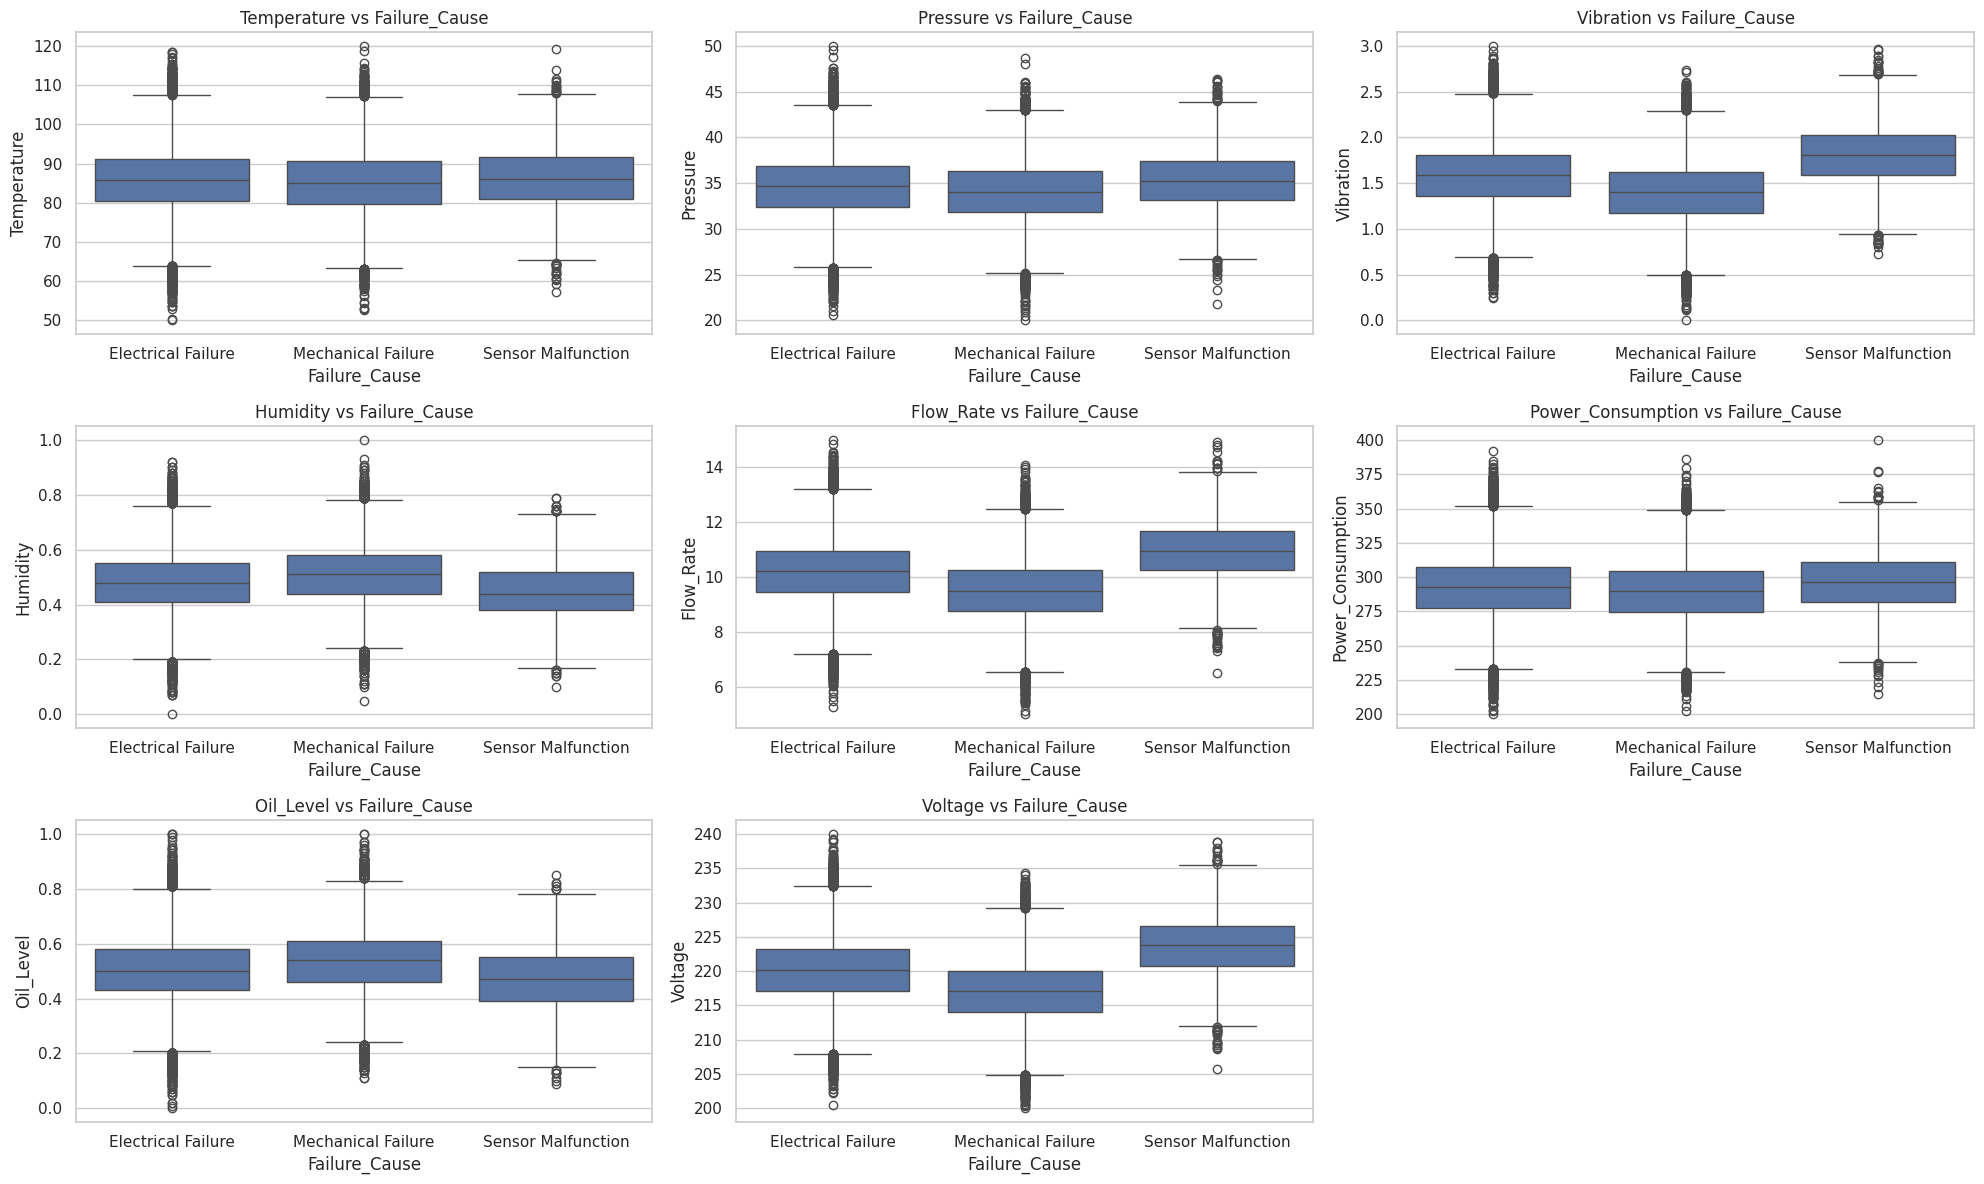

In [13]:
plt.figure(figsize=(20, 12))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df['Failure_Cause'], y=df[column])
    plt.title(f'{column} vs Failure_Cause')

plt.tight_layout()
plt.show()

In [14]:
df.head()

,Equipment_ID,Temperature,Pressure,Vibration,Humidity,Flow_Rate,Power_Consumption,Oil_Level,Voltage,Maintenance_Type,Failure_Cause,Maintenance_Cost,Production_Volume,Planned_Downtime_Hours,Shifts_Per_Day,Production_Days_Per_Week,Installation_Date,Failure_Date,Maintenance_Date
0,77546,80.03,34.84,1.59,0.50,10.91,298.67,0.34,216.01,Preventive,Electrical Failure,579.69,196,4,2,6,2020-10-25,2021-08-16,2021-08-29
1,529399,90.39,32.63,1.29,0.43,10.20,300.22,0.41,220.97,Preventive,Electrical Failure,647.95,291,2,2,6,2019-12-16,2021-04-06,2021-04-19
2,194027,93.52,37.43,1.84,0.41,10.61,315.68,0.48,232.13,Corrective,Electrical Failure,664.85,308,4,1,5,2020-05-03,2021-05-14,2021-05-27
3,588205,91.57,35.36,1.44,0.29,10.59,296.97,0.55,217.34,Preventive,Mechanical Failure,582.15,328,4,3,5,2020-04-17,2021-07-11,2021-07-24
4,354137,82.37,31.54,1.66,0.48,10.40,339.35,0.56,216.79,Preventive,Electrical Failure,715.05,234,4,2,5,2020-08-16,2021-03-02,2021-03-15


### PREDICTING MAINTENANCE COST

Feature Engeenering

In [15]:
df_m = df.copy()

In [16]:
# Automatically assign numbers to unique categories
df_m = df.drop(columns=['Installation_Date', 'Failure_Date', 'Maintenance_Date',"Equipment_ID" ])
df_m =  pd.get_dummies(df_m)


df_m

,Temperature,Pressure,Vibration,Humidity,Flow_Rate,Power_Consumption,Oil_Level,Voltage,Maintenance_Cost,Production_Volume,Planned_Downtime_Hours,Shifts_Per_Day,Production_Days_Per_Week,Maintenance_Type_Corrective,Maintenance_Type_Preventive,Failure_Cause_Electrical Failure,Failure_Cause_Mechanical Failure,Failure_Cause_Sensor Malfunction
0,80.03,34.84,1.59,0.50,10.91,298.67,0.34,216.01,579.69,196,4,2,6,False,True,True,False,False
1,90.39,32.63,1.29,0.43,10.20,300.22,0.41,220.97,647.95,291,2,2,6,False,True,True,False,False
2,93.52,37.43,1.84,0.41,10.61,315.68,0.48,232.13,664.85,308,4,1,5,True,False,True,False,False
3,91.57,35.36,1.44,0.29,10.59,296.97,0.55,217.34,582.15,328,4,3,5,False,True,False,True,False
4,82.37,31.54,1.66,0.48,10.40,339.35,0.56,216.79,715.05,234,4,2,5,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127635,90.90,35.52,1.27,0.34,9.52,309.04,0.60,228.05,623.37,280,5,1,5,True,False,False,True,False
127636,99.93,39.77,1.98,0.28,11.16,285.89,0.54,229.97,487.98,280,5,2,5,False,True,True,False,False
127637,103.23,39.56,1.93,0.39,11.80,273.59,0.60,220.25,488.85,314,3,2,5,True,False,True,False,False
127638,81.36,36.65,1.95,0.50,9.04,267.20,0.58,212.01,489.96,242,4,2,5,False,True,False,True,False


In [17]:
# === Define Features and Target ===
X_mc = df_m.drop(columns=['Maintenance_Cost'])
y_mc = df_m['Maintenance_Cost']

# === Save column names for later ===
mc_feature_names = X_mc.columns.tolist()

# === Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_mc, y_mc, test_size=0.2, random_state=42)

# === Scale AFTER Splitting ===
scaler_mc = StandardScaler()
X_train = scaler_mc.fit_transform(X_train)
X_test = scaler_mc.transform(X_test)


In [18]:
# === Models to Compare ===
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# === Evaluate Models ===
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    mape = mean_absolute_percentage_error(y_test, preds) * 100

    results.append({
        'Model': name,
        'RMSE': round(rmse, 2),
        'R²': round(r2, 3),
        'MAPE (%)': round(mape, 2)
    })

# === Show Results ===
results_df = pd.DataFrame(results).sort_values(by='RMSE')
print("\nModel Performance Comparison:")
print(results_df)



Model Performance Comparison:
              Model   RMSE     R²  MAPE (%)
2           XGBoost  81.23  0.395     12.73
1  GradientBoosting  81.56  0.390     12.83
0      RandomForest  81.90  0.385     12.85


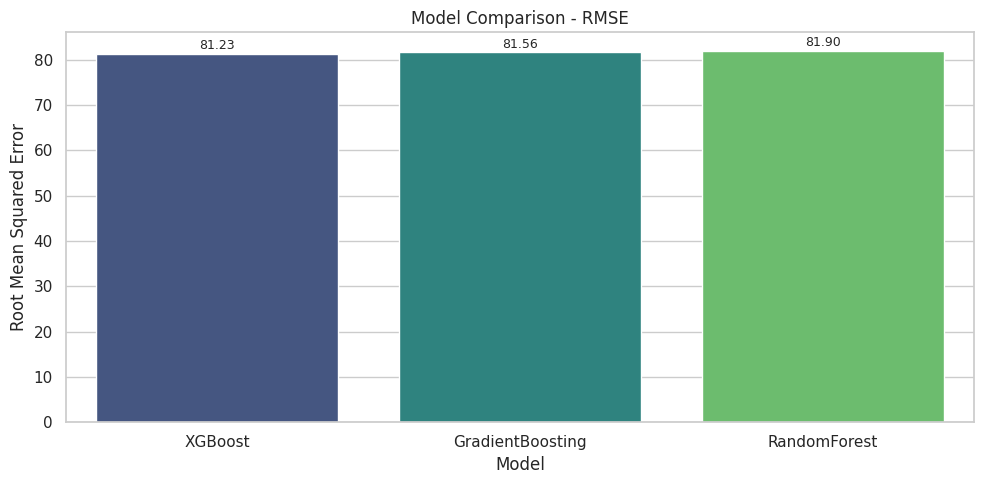

In [19]:
# Make sure DataFrame is reset after sorting
results_df = pd.DataFrame(results).sort_values(by='RMSE').reset_index(drop=True)

plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x='Model', y='RMSE', palette='viridis')

# Add RMSE labels above bars
for i, row in results_df.iterrows():
    plt.text(i, row['RMSE'] + 1, f"{row['RMSE']:.2f}", ha='center', fontsize=9)

plt.title("Model Comparison - RMSE")
plt.ylabel("Root Mean Squared Error")
plt.xlabel("Model")
plt.tight_layout()
plt.show()


Feature Importance

In [20]:
# Re-train the best model on full dataset (optional)
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
best_model.fit(X_mc, y_mc)  # full data


# Get feature importances
importances = best_model.feature_importances_



In [21]:
feature_importance_df = pd.DataFrame({
    'Feature': mc_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


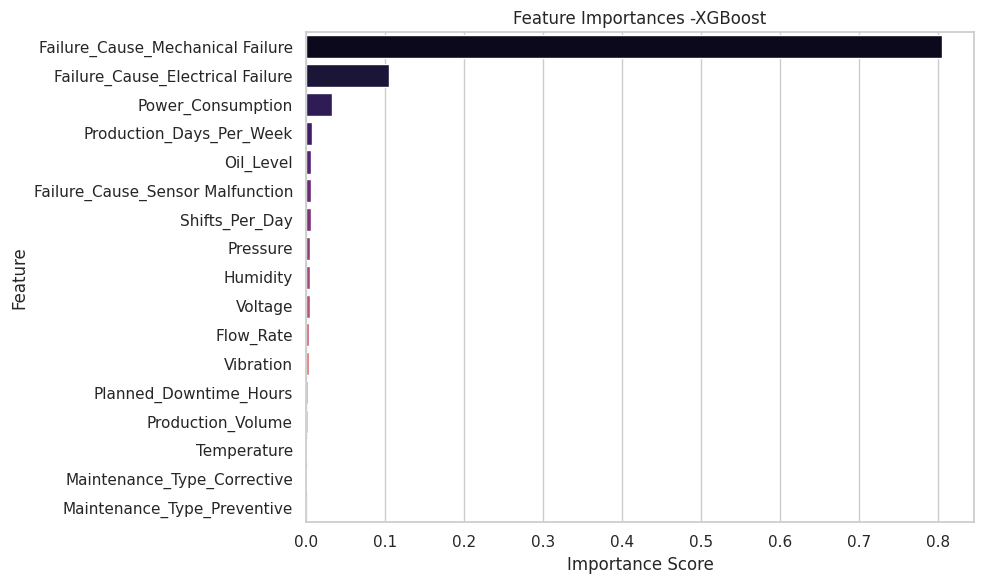

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='magma')
plt.title("Feature Importances -XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [23]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [24]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # can also try 'r2'
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [25]:
best_xgb_mc = grid_search.best_estimator_

# Predict & evaluate
y_pred = best_xgb_mc.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print("\nBest Hyperparameters:", grid_search.best_params_)
print(f"Tuned XGBoost Performance:\nRMSE: {rmse:.2f}, R²: {r2:.3f}, MAPE: {mape:.2f}%")



Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Tuned XGBoost Performance:
RMSE: 80.18, R²: 0.411, MAPE: 12.56%


In [26]:
importances = best_xgb_mc.feature_importances_

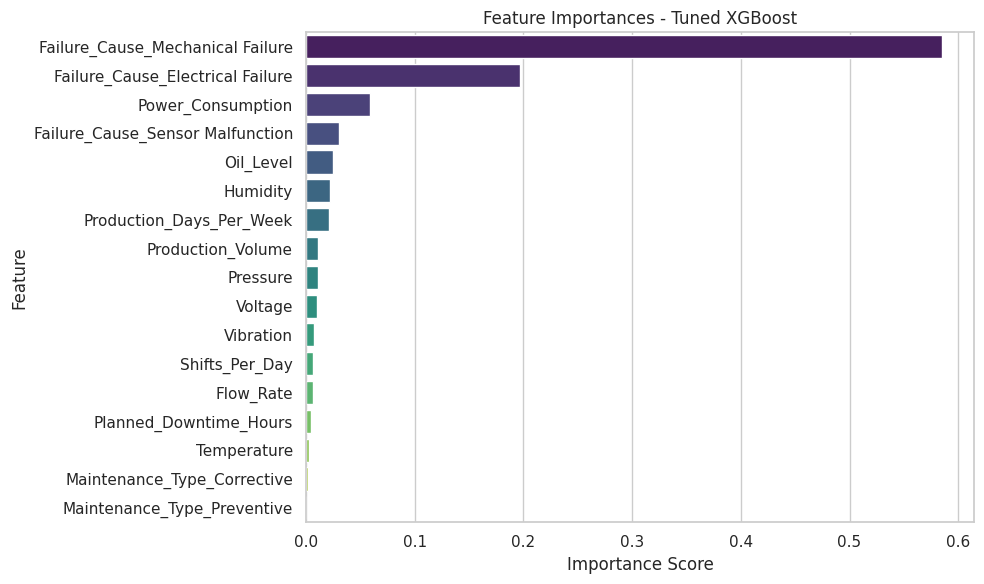

In [27]:
# Combine features + importances into DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': mc_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Top 20
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20), palette='viridis')
plt.title("Feature Importances - Tuned XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Days till failure

In [28]:
df_dtf = df.copy()

In [29]:
df_dtf['Installation_Date'] = pd.to_datetime(df_dtf['Installation_Date'])
df_dtf['Failure_Date'] = pd.to_datetime(df_dtf['Failure_Date'])

df_dtf['Days_Till_Failure'] = pd.to_timedelta(df_dtf['Failure_Date'] - df_dtf['Installation_Date']).dt.days

In [30]:
# Automatically assign numbers to unique categories
df_dtf = df_dtf.drop(columns=['Installation_Date', 'Failure_Date', 'Maintenance_Date', "Equipment_ID"])
df_dtf =  pd.get_dummies(df_dtf)


In [31]:
# Features & target
X_dtf = df_dtf.drop(columns=['Days_Till_Failure'])
y_dtf = df_dtf['Days_Till_Failure']
feature_names_dtf = X_dtf.columns.tolist()

# Split
X_train, X_test, y_train, y_test = train_test_split(X_dtf, y_dtf, test_size=0.2, random_state=42)

# Scale
scaler_dtf = StandardScaler()
X_train = scaler_dtf.fit_transform(X_train)
X_test = scaler_dtf.transform(X_test)


In [32]:
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    mape = mean_absolute_percentage_error(y_test, preds) * 100

    results.append({
        'Model': name,
        'RMSE': round(rmse, 2),
        'R²': round(r2, 3),
        'MAPE (%)': round(mape, 2)
    })

results_df = pd.DataFrame(results).sort_values(by='RMSE').reset_index(drop=True)
print("\nModel Comparison - Days Till Failure (Your Style):")
print(results_df)



Model Comparison - Days Till Failure (Your Style):
              Model   RMSE     R²  MAPE (%)
0           XGBoost  49.59  0.443     11.70
1  GradientBoosting  50.05  0.433     11.92
2      RandomForest  50.91  0.413     12.10


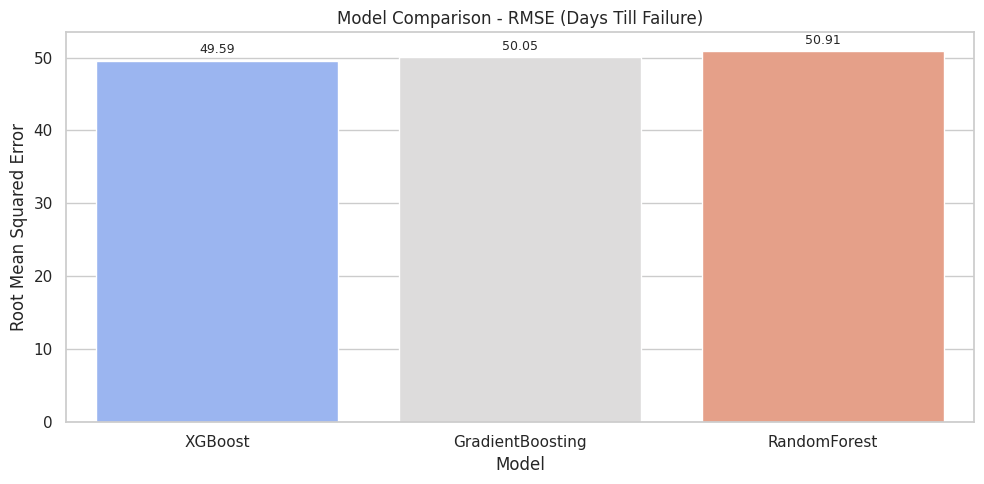

In [33]:
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x='Model', y='RMSE', palette='coolwarm')

# Add RMSE values on top
for i, row in results_df.iterrows():
    plt.text(i, row['RMSE'] + 1, f"{row['RMSE']:.2f}", ha='center', fontsize=9)

plt.title("Model Comparison - RMSE (Days Till Failure)")
plt.ylabel("Root Mean Squared Error")
plt.xlabel("Model")
plt.tight_layout()
plt.show()


In [34]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [35]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_xgb_dtf = grid_search.best_estimator_


Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

y_pred = best_xgb_dtf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print("\nBest XGBoost Params:", grid_search.best_params_)
print(f"Tuned XGBoost - RMSE: {rmse:.2f}, R²: {r2:.3f}, MAPE: {mape:.2f}%")



Best XGBoost Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Tuned XGBoost - RMSE: 48.69, R²: 0.463, MAPE: 11.51%


In [37]:
# best_xgb = grid_search.best_estimator_
feature_names_dtf = X_dtf.columns.tolist()
import pandas as pd

# Extract feature importances
importances = best_xgb_dtf.feature_importances_

# Create a DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names_dtf,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


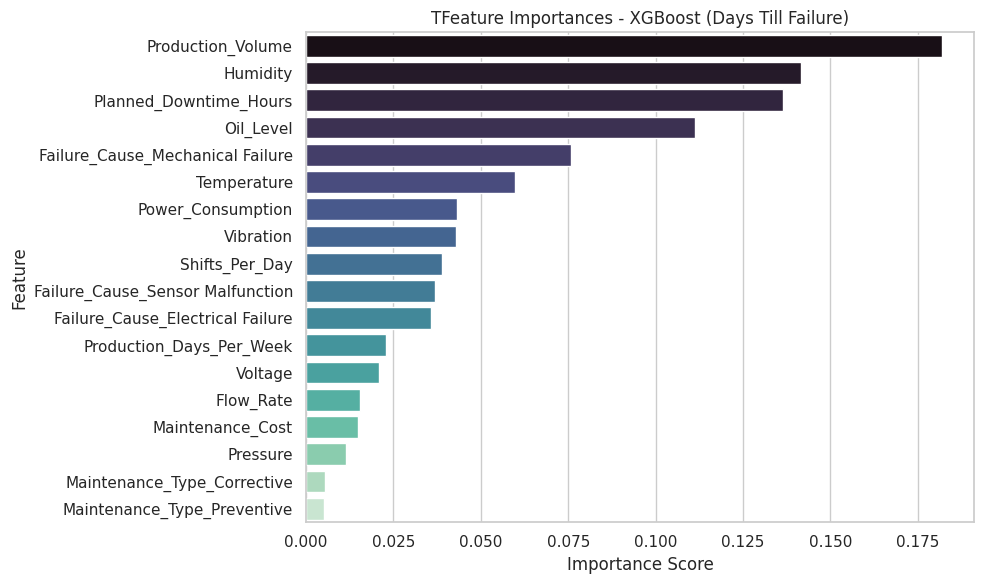

In [38]:
# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20), palette='mako')
plt.title("TFeature Importances - XGBoost (Days Till Failure)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [39]:
# import joblib
# import json

# # Save maintenance cost model & scaler
# joblib.dump(best_xgb_mc, 'best_xgb_mc.pkl')
# joblib.dump(scaler_mc, 'scaler_cost_mc.pkl')
# with open('features_cost.json', 'w') as f:
#     json.dump(mc_feature_names, f)

# # Save DTF model & scaler
# joblib.dump(best_xgb_dtf, 'best_xgb_dtf.pkl')
# joblib.dump(scaler_dtf, 'scaler_dtf.pkl')
# with open('features_dtf.json', 'w') as f:
#     json.dump(feature_names_dtf, f)


In [40]:
#!pip install streamlit


In [41]:
# import streamlit as st
# import pandas as pd
# import numpy as np
# import joblib
# import json

# # Load models & scalers
# model_cost = joblib.load("best_xgb_mc.pkl")
# scaler_cost = joblib.load("scaler_cost_mc.pkl")
# with open("features_cost.json") as f:
#     features_cost = json.load(f)

# model_dtf = joblib.load("best_xgb_dtf.pkl")
# scaler_dtf = joblib.load("scaler_dtf.pkl")
# with open("features_dtf.json") as f:
#     features_dtf = json.load(f)

# # Get common features
# common_features = sorted(list(set(features_cost).intersection(set(features_dtf))))

# # Streamlit UI
# st.set_page_config(page_title="Maintenance & Failure Predictor", layout="centered")
# st.title("🔧 Predict Maintenance Cost & Days Till Failure")
# st.markdown("Enter equipment and maintenance data to predict:")

# st.markdown("🧮 **Estimated Maintenance Cost**")
# st.markdown("⏳ **Estimated Days Till Failure**")


# # Input fields
# input_data = {}
# st.subheader("📥 Input Equipment Parameters")
# for feature in common_features:
#     input_data[feature] = st.number_input(f"{feature}", value=0.0)

# # Predict
# if st.button("🧠 Predict Both"):
#     input_df = pd.DataFrame([input_data])

#     # Predict Maintenance Cost
#     x_cost = scaler_cost.transform(input_df[features_cost])
#     cost_pred = model_cost.predict(x_cost)[0]

#     # Predict Days Till Failure
#     x_dtf = scaler_dtf.transform(input_df[features_dtf])
#     dtf_pred = model_dtf.predict(x_dtf)[0]

#     # Results
#     st.success(f"💸 **Predicted Maintenance Cost:** ${cost_pred:,.2f}")
#     st.success(f"⏳ **Estimated Days Till Failure:** {int(dtf_pred)} days")


In [42]:
# with open("app.py", "w") as f:
#     f.write("""
# import streamlit as st
# import pandas as pd
# import numpy as np
# import joblib
# import json

# # Load models & scalers
# model_cost = joblib.load("best_xgb_cost.pkl")
# scaler_cost = joblib.load("scaler_cost.pkl")
# with open("features_cost.json") as f:
#     features_cost = json.load(f)

# model_dtf = joblib.load("best_xgb_dtf.pkl")
# scaler_dtf = joblib.load("scaler_dtf.pkl")
# with open("features_dtf.json") as f:
#     features_dtf = json.load(f)

# common_features = sorted(list(set(features_cost).intersection(set(features_dtf))))

# st.set_page_config(page_title="Maintenance & Failure Predictor", layout="centered")
# st.title("🔧 Predict Maintenance Cost & Days Till Failure")
# st.markdown("Enter equipment and maintenance data to predict:")
# st.markdown("🧮 **Estimated Maintenance Cost**  \n⏳ **Estimated Days Till Failure**")

# input_data = {}
# st.subheader("📥 Input Equipment Parameters")
# for feature in common_features:
#     input_data[feature] = st.number_input(f"{feature}", value=0.0)

# if st.button("🧠 Predict Both"):
#     input_df = pd.DataFrame([input_data])

#     x_cost = scaler_cost.transform(input_df[features_cost])
#     cost_pred = model_cost.predict(x_cost)[0]

#     x_dtf = scaler_dtf.transform(input_df[features_dtf])
#     dtf_pred = model_dtf.predict(x_dtf)[0]

#     st.success(f"💸 **Predicted Maintenance Cost:** ${cost_pred:,.2f}")
#     st.success(f"⏳ **Estimated Days Till Failure:** {int(dtf_pred)} days")
# """)


In [43]:
X_mc.columns

Index(['Temperature', 'Pressure', 'Vibration', 'Humidity', 'Flow_Rate',
       'Power_Consumption', 'Oil_Level', 'Voltage', 'Production_Volume',
       'Planned_Downtime_Hours', 'Shifts_Per_Day', 'Production_Days_Per_Week',
       'Maintenance_Type_Corrective', 'Maintenance_Type_Preventive',
       'Failure_Cause_Electrical Failure', 'Failure_Cause_Mechanical Failure',
       'Failure_Cause_Sensor Malfunction'],
      dtype='object')